# SEM PLS

## Preparation

In [1]:
constructs = {
    'PKK': ['PR', 'KF', 'PV', 'AK', 'TK'],
    'K3': ['PK3', 'APD', 'PK', 'PB', 'LK'],
    'EPKK': ['WR', 'TP', 'PK_Y1', 'ES'],
    'FPKK': ['DP', 'BK', 'EM', 'PB_Y2']
}

hypotheses = [
    ('PKK_score', 'EPKK_score'),  # H1
    ('PKK_score', 'FPKK_score'),  # H2
    ('K3_score', 'EPKK_score'),   # H3
    ('K3_score', 'FPKK_score')    # H4
]

Con_rand = {
    'PKK': ['PR', 'KF', 'PV', 'AK', 'TK'],
    'K3': ['PK3', 'APD', 'PK', 'PB', 'LK'],
    'EPKK': ['WR', 'TP', 'PK_Y1', 'ES'],
    'FPKK': ['DP', 'BK', 'EM', 'PB_Y2']
}

noise_dict = {
    'PR': 0.25,   # Pelayanan Kesehatan Karyawan - PR
    'KF': 0.35,   # Pelayanan Kesehatan Karyawan - KF
    'PV': 0.25,   # Pelayanan Kesehatan Karyawan - PV
    'AK': 0.25,   # Pelayanan Kesehatan Karyawan - AK
    'TK': 0.20,   # Pelayanan Kesehatan Karyawan - TK
    'PK3': 0.15,  # Keselamatan dan Kesehatan Kerja - PK3
    'APD': 0.25,  # Keselamatan dan Kesehatan Kerja - APD
    'PK': 0.15,   # Keselamatan dan Kesehatan Kerja - PK
    'PB': 0.15,   # Keselamatan dan Kesehatan Kerja - PB
    'LK': 0.25,   # Keselamatan dan Kesehatan Kerja - LK
    'WR': 0.17,   # Efektivitas Penanganan Kecelakaan Kerja - WR
    'TP': 0.15,   # Efektivitas Penanganan Kecelakaan Kerja - TP
    'PK_Y1': 0.25, # Efektivitas Penanganan Kecelakaan Kerja - PK_Y1
    'ES': 0.25,   # Efektivitas Penanganan Kecelakaan Kerja - ES
    'DP': 0.15,   # Efisiensi Penanganan Kecelakaan Kerja - DP
    'BK': 0.18,   # Efisiensi Penanganan Kecelakaan Kerja - BK
    'EM': 0.25,   # Efisiensi Penanganan Kecelakaan Kerja - EM
    'PB_Y2': 0.14  # Efisiensi Penanganan Kecelakaan Kerja - PB_Y2
}


In [9]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from itertools import combinations

# === STEP 1: Load Data (file CSV yang berisi data kuesioner, sudah diupload ke Colab) ===
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# constructs = {
#     'CE': ['CE1', 'CE2', 'CE3', 'CE4', 'CE5'],
#     'CS': ['CS1', 'CS2', 'CS3', 'CS4', 'CS5'],
#     'SQ': ['SQ1', 'SQ2', 'SQ3','SQ4', 'SQ5'],
#     'MP': ['MP1', 'MP2', 'MP3', 'MP4', 'MP5']
# }

# === STEP 2.5: Generate skor total konstruk (rata-rata per konstruk) ===
for construct, indicators in constructs.items():
    df[f'{construct}_score'] = df[indicators].mean(axis=1)


Saving data_manipulasi_sem.csv to data_manipulasi_sem (2).csv


In [ ]:
df.describe()

In [ ]:
df


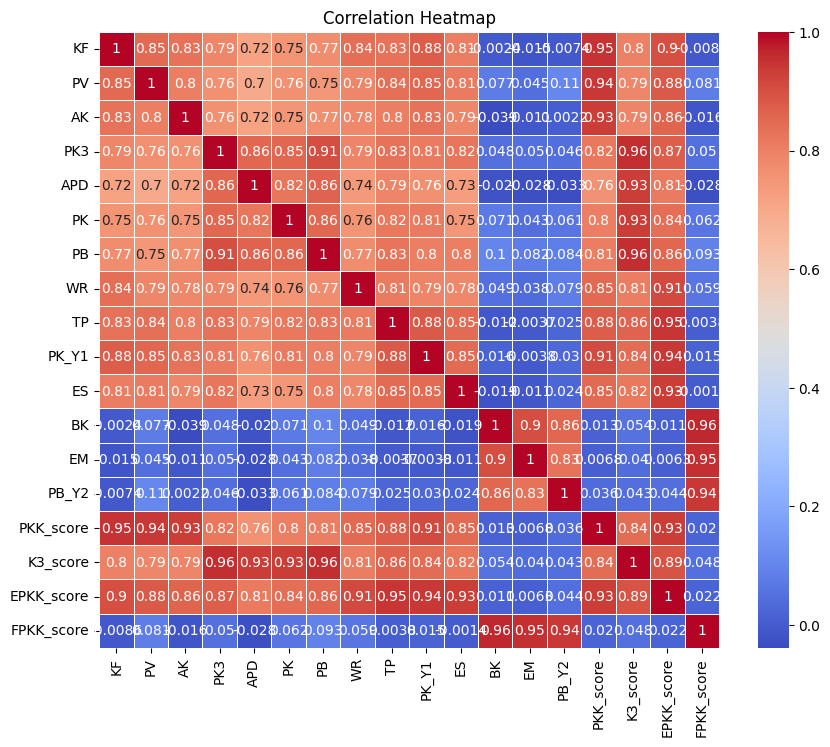

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalnya df sudah didefinisikan
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Droping

In [ ]:
# # Kolom yang mau dibuang dari DataFrame
# to_drop = ['CS5', 'MP2', 'MP5','CE2','CE4','SQ3','SQ5']
# df = df.drop(columns=to_drop)

# Daftar indikator yang dikeluarkan berdasarkan model
to_drop = ['PR', 'TK', 'LK', 'DP']

# Menghapus kolom yang tidak termasuk dalam model
df = df.drop(columns=to_drop)

In [7]:
# constructs = {
#     'CE': ['CE1','CE3','CE5'],
#     'CS': ['CS1','CS2','CS4', 'CS3'],
#     'SQ': ['SQ1', 'SQ2','SQ4'],
#     'MP': ['MP1','MP3', 'MP4']
# }


constructs = {
    'PKK': ['KF', 'PV', 'AK'],  # Indikator yang tetap
    'K3': ['PK3', 'APD', 'PK', 'PB'],  # Indikator yang tetap
    'EPKK': ['WR', 'TP', 'PK_Y1', 'ES'],  # Indikator yang tetap
    'FPKK': ['BK', 'EM', 'PB_Y2']  # Indikator yang tetap
}

In [ ]:
# Hapus 20 baris terakhir
# df = df.drop(df.index[-20:])


## Outter Model


### Uji Validitas Konvergen

In [11]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# === STEP 3: Validitas Konvergen (Outer Loadings dan AVE) ===

# Fungsi untuk menghitung outer loading (korelasi indikator dengan skor total konstruk)
def outer_loadings(df, indicators, total_score):
    return {item: pearsonr(df[item], df[total_score])[0] for item in indicators}

# Fungsi untuk menghitung AVE (Average Variance Extracted)
def calculate_ave(loadings_dict):
    return np.mean([v**2 for v in loadings_dict.values()])

# Simpan hasil loading & AVE
loading_results = {}
ave_results = {}

# Data tabel untuk ditampilkan
loading_table_data = []

for construct, indicators in constructs.items():
    # Hitung skor total konstruk
    df[f'{construct}_total'] = df[indicators].mean(axis=1)

    # Hitung outer loading dan AVE
    loadings = outer_loadings(df, indicators, f'{construct}_total')
    ave = calculate_ave(loadings)

    loading_results[construct] = loadings
    ave_results[construct] = ave

    # Simpan ke tabel
    for item, loading in loadings.items():
        loading_table_data.append({
            'Konstruk': construct,
            'Indikator': item,
            'Outer Loading': round(loading, 4),
            'AVE': round(ave, 4) if item == indicators[0] else ''  # hanya tampilkan AVE sekali per konstruk
        })

# Buat DataFrame tabel validitas konvergen
validitas_df = pd.DataFrame(loading_table_data)

print("=== Tabel Validitas Konvergen (Outer Loadings & AVE) ===")
display(validitas_df)


=== Tabel Validitas Konvergen (Outer Loadings & AVE) ===


,Konstruk,Indikator,Outer Loading,AVE
0,PKK,KF,0.9499,0.886
1,PKK,PV,0.9409,
2,PKK,AK,0.9330,
3,K3,PK3,0.9571,0.8953
4,K3,APD,0.9350,
5,K3,PK,0.9331,
6,K3,PB,0.9593,
7,EPKK,WR,0.9123,0.8704
8,EPKK,TP,0.9456,
9,EPKK,PK_Y1,0.9423,


### Uji Reabilitas

In [12]:
import pandas as pd
import numpy as np
from itertools import combinations

# === STEP 4: Reliabilitas Konstruk (Cronbach’s Alpha & Composite Reliability) ===
def cronbach_alpha(data):
    k = data.shape[1]
    item_var = data.var(axis=0, ddof=1)
    total_var = data.sum(axis=1).var(ddof=1)
    return (k / (k - 1)) * (1 - item_var.sum() / total_var)

def composite_reliability(loadings):
    loadings = np.array(list(loadings.values()))
    sum_load_sq = np.sum(loadings**2)
    error_var = np.sum(1 - loadings**2)
    return sum_load_sq**2 / (sum_load_sq**2 + error_var)

# Simulasi loading_results dan ave_results (ganti dengan hasil outer loading sebenarnya)
# Contoh format:
# loading_results = {
#     'CE': {'CE1': 0.82, 'CE2': 0.84, 'CE3': 0.86},
#     ...
# }
# ave_results = {
#     'CE': 0.715, 'SQ': 0.689, ...
# }

# === Tabel Cronbach Alpha dan Composite Reliability ===
reliability_data = []

for construct, indicators in constructs.items():
    alpha = cronbach_alpha(df[indicators])
    cr = composite_reliability(loading_results[construct])
    reliability_data.append({
        'Konstruk': construct,
        'Cronbach Alpha': round(alpha, 4),
        'Composite Reliability': round(cr, 4)
    })

reliability_df = pd.DataFrame(reliability_data)

print("\n=== Tabel Reliabilitas ===")
display(reliability_df)

# === STEP 5: Validitas Diskriminan - Fornell-Larcker & HTMT ===
# Fornell-Larcker: √AVE vs korelasi antar konstruk
fornell_data = []

for c1 in constructs:
    for c2 in constructs:
        if c1 != c2:
            corr = df[f"{c1}_total"].corr(df[f"{c2}_total"])
            sqrt_ave = np.sqrt(ave_results[c1])
            fornell_data.append({
                'Konstruk 1': c1,
                'Konstruk 2': c2,
                '√AVE Konstruk 1': round(sqrt_ave, 4),
                'Korelasi K1-K2': round(corr, 4)
            })

fornell_df = pd.DataFrame(fornell_data)

print("\n=== Tabel Fornell-Larcker Criterion ===")
display(fornell_df)

# HTMT (Heterotrait-Monotrait Ratio)
def compute_htmt(df, construct1, construct2):
    indicators1 = constructs[construct1]
    indicators2 = constructs[construct2]
    htmt_vals = []
    for i, j in combinations(indicators1 + indicators2, 2):
        if (i in indicators1 and j in indicators2) or (j in indicators1 and i in indicators2):
            htmt_vals.append(abs(df[i].corr(df[j])))
    return np.mean(htmt_vals)

htmt_data = []
checked_pairs = set()

for c1 in constructs:
    for c2 in constructs:
        if c1 != c2 and (c2, c1) not in checked_pairs:
            htmt_val = compute_htmt(df, c1, c2)
            htmt_data.append({
                'Konstruk 1': c1,
                'Konstruk 2': c2,
                'HTMT Ratio': round(htmt_val, 4)
            })
            checked_pairs.add((c1, c2))

htmt_df = pd.DataFrame(htmt_data)

print("\n=== Tabel HTMT (Heterotrait-Monotrait Ratio) ===")
display(htmt_df)



=== Tabel Reliabilitas ===


,Konstruk,Cronbach Alpha,Composite Reliability
0,PKK,0.9355,0.9538
1,K3,0.9609,0.9684
2,EPKK,0.9486,0.9590
3,FPKK,0.9491,0.9645



=== Tabel Fornell-Larcker Criterion ===


,Konstruk 1,Konstruk 2,√AVE Konstruk 1,Korelasi K1-K2
0,PKK,K3,0.9413,0.8426
1,PKK,EPKK,0.9413,0.9345
2,PKK,FPKK,0.9413,0.0199
3,K3,PKK,0.9462,0.8426
4,K3,EPKK,0.9462,0.8935
5,K3,FPKK,0.9462,0.0476
6,EPKK,PKK,0.9330,0.9345
7,EPKK,K3,0.9330,0.8935
8,EPKK,FPKK,0.9330,0.0217
9,FPKK,PKK,0.9533,0.0199



=== Tabel HTMT (Heterotrait-Monotrait Ratio) ===


,Konstruk 1,Konstruk 2,HTMT Ratio
0,PKK,K3,0.7501
1,PKK,EPKK,0.8204
2,PKK,FPKK,0.0340
3,K3,EPKK,0.7887
4,K3,FPKK,0.0556
5,EPKK,FPKK,0.0259


## Innermodel

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# STEP 1: Hitung skor konstruk (mean per responden)
for construct, indicators in constructs.items():
    df[f'{construct}_score'] = df[indicators].mean(axis=1)

# STEP 2: Definisikan hipotesis (Inner Model)
# Format: (Variabel independen, Variabel dependen)
# hypotheses = [
#     ('CE_score', 'CS_score'),   # H1
#     ('SQ_score', 'CS_score'),   # H2
#     ('CE_score', 'MP_score'),   # H3
#     ('SQ_score', 'MP_score'),   # H4
#     ('CS_score', 'MP_score')    # H5
# ]

# STEP 3: Jalankan regresi dan tampilkan hasil path coefficient dan R²
# === Path Coefficients & R2 ===
path_results = []
for x_var, y_var in hypotheses:
    X = df[[x_var]]
    y = df[y_var]
    model = LinearRegression()
    model.fit(X, y)

    beta = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)

    path_results.append({
        'Predictor': x_var,
        'Outcome': y_var,
        'Coefficient (β)': round(beta, 4),
        'Intercept': round(intercept, 4),
        'R²': round(r_squared, 4)
    })

# Buat DataFrame untuk Path Model
path_df = pd.DataFrame(path_results)

# === Bootstrapping untuk uji t-value ===
bootstrap_results = []
n_boot = 500
for x_var, y_var in hypotheses:
    X = df[[x_var]]
    y = df[y_var]
    betas = []

    for _ in range(n_boot):
        X_resampled, y_resampled = resample(X, y)
        model = LinearRegression().fit(X_resampled, y_resampled)
        betas.append(model.coef_[0])

    boot_mean = np.mean(betas)
    boot_std = np.std(betas, ddof=1)
    t_value = boot_mean / boot_std if boot_std != 0 else 0
    signif = 'Signifikan' if abs(t_value) >= 1.96 else 'Tidak Signifikan'

    bootstrap_results.append({
        'Predictor': x_var,
        'Outcome': y_var,
        'Mean β': round(boot_mean, 4),
        'Std Dev': round(boot_std, 4),
        't-value': round(t_value, 3),
        'Significance': signif
    })

# Buat DataFrame untuk Bootstrapping
boot_df = pd.DataFrame(bootstrap_results)

# === Tampilkan tabel hasil ===
print("=== Path Coefficients dan R² ===")
display(path_df)

print("\n=== Hasil Bootstrapping (Uji t-value) ===")
display(boot_df)

=== Path Coefficients dan R² ===


,Predictor,Outcome,Coefficient (β),Intercept,R²
0,PKK_score,EPKK_score,0.8947,0.3099,0.8733
1,PKK_score,FPKK_score,0.0218,2.9898,0.0004
2,K3_score,EPKK_score,0.8829,0.3076,0.7983
3,K3_score,FPKK_score,0.0539,2.8936,0.0023



=== Hasil Bootstrapping (Uji t-value) ===


,Predictor,Outcome,Mean β,Std Dev,t-value,Significance
0,PKK_score,EPKK_score,0.8969,0.0313,28.685,Signifikan
1,PKK_score,FPKK_score,0.0174,0.0927,0.188,Tidak Signifikan
2,K3_score,EPKK_score,0.8836,0.0375,23.566,Signifikan
3,K3_score,FPKK_score,0.0502,0.1002,0.501,Tidak Signifikan


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
class "Pkk (PKK)" as PKK {
    +KF: Indicator
    +PV: Indicator
    +AK: Indicator
}

class "K3 (K3)" as K3 {
    +PK3: Indicator
    +APD: Indicator
    +PK: Indicator
    +PB: Indicator
}

class "Epkk (EPKK)" as EPKK {
    +WR: Indicator
    +TP: Indicator
    +PK_Y1: Indicator
    +ES: Indicator
}

class "Fpkk (FPKK)" as FPKK {
    +BK: Indicator
    +EM: Indicator
    +PB_Y2: Indicator
}

' Inner Model (Hubungan Antar Konstruk)
PKK --> EPKK : β = 0.89
PKK --> FPKK : β = 0.02
K3 --> EPKK : β = 0.88
K3 --> FPKK : β = 0.05
@enduml

✅ PUML with beta values saved to: inner_model.puml


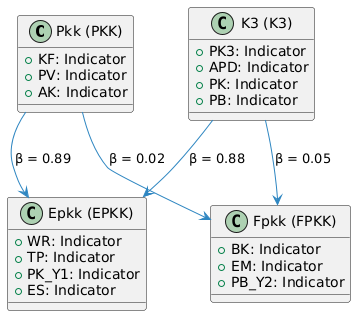

In [14]:
!pip install plantuml
!apt-get install graphviz

from plantuml import PlantUML
from IPython.display import Image, display
import os

# Fungsi untuk generate file .puml berdasarkan konstruk dan hipotesis
def generate_inner_model_puml_dynamic(constructs, hypotheses, path_results, filename="inner_model.puml"):
    """
    Menghasilkan file .puml dengan konstruk, indikator, dan hanya menampilkan nilai koefisien beta antar konstruk.

    :param constructs: Dictionary konstruk dan indikatornya.
    :param hypotheses: List tuple (source, target) antar konstruk.
    :param path_results: List of dicts dengan kolom: Predictor, Outcome, Coefficient (β).
    :param filename: Nama file output (.puml).
    """
    # Mengubah path_results menjadi dictionary untuk akses yang lebih cepat
    path_dict = {(row['Predictor'], row['Outcome']): row['Coefficient (β)'] for row in path_results}

    with open(filename, "w") as f:
        # Header
        f.write("@startuml\n")
        f.write("skinparam ArrowColor #2E86C1\n")
        f.write("skinparam ArrowFontColor black\n")
        f.write("skinparam defaultTextAlignment center\n\n")

        # Outer Model (Konstruk dan Indikator)
        f.write("' Outer Model (Konstruk dan Indikator)\n")
        for construct, indicators in constructs.items():
            label = ' '.join([w.capitalize() for w in construct.split('_')])
            full_label = f"{label} ({construct.upper()})"
            f.write(f'class "{full_label}" as {construct} {{\n')
            print(f'class "{full_label}" as {construct} {{')
            for indicator in indicators:
                f.write(f'    +{indicator}: Indicator\n')
                print(f'    +{indicator}: Indicator')
            f.write("}\n\n")
            print("}\n")

        # Inner Model (Hubungan Antar Konstruk)
        f.write("' Inner Model (Hubungan Antar Konstruk)\n")
        print("' Inner Model (Hubungan Antar Konstruk)")

        for source_score, target_score in hypotheses:
            src = source_score.replace('_score', '')
            tgt = target_score.replace('_score', '')

            # Cari nilai β langsung dari path_dict menggunakan pasangan (Predictor, Outcome)
            beta_value = path_dict.get((source_score, target_score), None)

            # Menyusun label dengan nilai β atau pesan jika tidak ditemukan
            if beta_value is not None:
                # Membulatkan nilai β dan memastikan format output yang benar
                beta_value_rounded = round(float(beta_value), 2)
                label = f"β = {beta_value_rounded}"
            else:
                label = "(β not found)"

            # Menulis ke file dan print hasilnya
            line = f"{src} --> {tgt} : {label}"
            f.write(line + "\n")
            print(line)

        # Footer
        f.write("\n@enduml\n")
        print("@enduml")

    print(f"\n✅ PUML with beta values saved to: {filename}")


# Fungsi untuk render file .puml menjadi gambar dan menampilkan di Jupyter
def render_and_display_puml(puml_path="inner_model.puml", output_path="inner_model.png"):
    server = PlantUML(url="http://www.plantuml.com/plantuml/img/")

    # Baca file .puml
    with open(puml_path, 'r') as f:
        puml_code = f.read()

    # Render menggunakan server PlantUML
    image = server.processes(puml_code)

    # Simpan hasil gambar
    with open(output_path, "wb") as f:
        f.write(image)

    # Tampilkan gambar di Jupyter
    display(Image(output_path))



# --- Definisikan Konstruk dan Hipotesis ---


# Generate file .puml dinamis
generate_inner_model_puml_dynamic(constructs, hypotheses,path_results)


# Render dan tampilkan gambar
render_and_display_puml("inner_model.puml", "inner_model.png")



# Random data

## Random Data


In [2]:
import pandas as pd
import numpy as np
from google.colab import files

def adjust_or_generate_data(
    df_uploaded=None,
    Con_rand=None,
    noise_dict=None,
    default_noise=0.2,
    n=100,
    likert_min=1,
    likert_max=5,
    is_continuous=False
):
    """
    Adjust uploaded dataset or generate new one if not uploaded.
    """

    # Jika tidak ada file, buat dari nol
    if df_uploaded is None:
        print("⚠️ Tidak ada file diupload. Membuat data baru...")
        df_result = pd.DataFrame(index=range(n))
        for indicators in Con_rand.values():
            for ind in indicators:
                noise = noise_dict.get(ind, default_noise) if noise_dict else default_noise
                df_result[ind] = np.random.randint(likert_min, likert_max + 1, n) + np.random.normal(0, noise, n)
    else:
        print("✅ File diupload. Menyesuaikan data...")
        df_result = df_uploaded.copy()
        original_len = len(df_result)

        # Tambah baris jika perlu
        if n > original_len:
            add_n = n - original_len
            temp_df = pd.DataFrame(index=range(add_n))
            for indicators in Con_rand.values():
                for ind in indicators:
                    noise = noise_dict.get(ind, default_noise) if noise_dict else default_noise
                    temp_df[ind] = np.random.randint(likert_min, likert_max + 1, add_n) + np.random.normal(0, noise, add_n)
            df_result = pd.concat([df_result, temp_df], ignore_index=True)

        # Potong baris jika lebih panjang
        if n < original_len:
            df_result = df_result.iloc[:n].copy()

        # Tambah noise baru ke kolom yang ditentukan
        for indicators in Con_rand.values():
            for ind in indicators:
                noise = noise_dict.get(ind, default_noise) if noise_dict else default_noise
                df_result[ind] = np.random.randint(likert_min, likert_max + 1, n) + np.random.normal(0, noise, n)

    # Rounding dan clipping
    all_columns = [ind for indicators in Con_rand.values() for ind in indicators]
    if is_continuous:
        df_result[all_columns] = df_result[all_columns].clip(likert_min, likert_max)
    else:
        df_result[all_columns] = df_result[all_columns].applymap(lambda x: min(likert_max, max(likert_min, round(x))))

    return df_result


In [4]:
# Step 1: Upload file
uploaded = files.upload()
df_uploaded = None
if uploaded:
    filename = list(uploaded.keys())[0]
    df_uploaded = pd.read_csv(filename)
    print(f"📄 File uploaded: {filename}")
else:
    print("⚠️ Tidak ada file diupload.")

# # Step 2: Define struktur dan noise
# Con_rand = {
#     'CE': ['CE1', 'CE2', 'CE3', 'CE4', 'CE5'],
#     'CS': ['CS1', 'CS2', 'CS3', 'CS4', 'CS5'],
#     'SQ': ['SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5'],
#     'MP': ['MP1', 'MP2', 'MP3', 'MP4', 'MP5']
# }

# noise_dict = {
#     'SQ1': 0.25, 'SQ2': 0.05,
#     'CE1': 0.25, 'CE5': 0.25,
#     'MP1': 0.10, 'MP3': 0.15, 'MP4': 0.25,
#     'CS1': 0.15, 'CS3': 0.05
# }

# Step 3: Jalankan fungsi
target_n = 137
final_df = adjust_or_generate_data(
    df_uploaded=df_uploaded,
    Con_rand=Con_rand,
    noise_dict=noise_dict,
    default_noise=0.2,
    n=target_n,
    likert_min=1,
    likert_max=5,
    is_continuous=False
)

# Step 4: Simpan hasil
output_path = '/content/Randomized_Data.csv'
final_df.to_csv(output_path, index=False)
print(f"✅ File disimpan di: {output_path}")


⚠️ Tidak ada file diupload.
⚠️ Tidak ada file diupload. Membuat data baru...
✅ File disimpan di: /content/data_adjusted.csv


/tmp/ipython-input-2-1192891183.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_result[all_columns] = df_result[all_columns].applymap(lambda x: min(likert_max, max(likert_min, round(x))))


## Specifik Random Data for Laten

In [5]:
import pandas as pd
import numpy as np
from google.colab import files

# === STEP 1: Upload file (opsional) ===
uploaded = files.upload()
df_uploaded = None

if uploaded:
    file_name = list(uploaded.keys())[0]
    df_uploaded = pd.read_csv(file_name)
    print(f"📄 File berhasil dimuat: {file_name}")
else:
    print("⚠️ Tidak ada file diupload. Data dummy akan dibuat dari nol.")

# === STEP 2: Fungsi utama ===
def adjust_or_generate_data(df_uploaded, Con_rand, relations=None, noise_dict=None,
                            default_noise=0.2, n=None, seed=123,
                            likert_min=1, likert_max=5, is_continuous=False):
    np.random.seed(seed)

    if df_uploaded is None:
        if n is None:
            raise ValueError("Jika tidak ada data upload, parameter n harus ditentukan.")
        df = pd.DataFrame(index=range(n))
    else:
        df = df_uploaded.copy()
        n = len(df)

    latent_vars = {}

    # Step 1: Buat latent variabel dasar (yang tidak punya outcome)
    all_outcomes = [r[0] for r in relations] if relations else []
    for constr in Con_rand:
        if constr not in all_outcomes:
            latent_vars[constr] = np.random.uniform(likert_min, likert_max, n)

    # Step 2: Hitung latent variabel berdasarkan relasi
    if relations:
        for outcome, predictors, coeffs in relations:
            value = np.zeros(n)
            for pred, coef in zip(predictors, coeffs):
                if pred not in latent_vars:
                    latent_vars[pred] = np.random.uniform(likert_min, likert_max, n)
                value += coef * latent_vars[pred]
            latent_vars[outcome] = value + np.random.normal(0, 0.1, n)

    # Step 3: Buat data indikator berdasarkan latent + noise
    for constr, indicators in Con_rand.items():
        for ind in indicators:
            noise = noise_dict.get(ind, noise_dict.get(constr, default_noise)) if noise_dict else default_noise
            df[ind] = latent_vars[constr] + np.random.normal(0, noise, n)

    # Step 4: Skala Likert
    if not is_continuous:
        all_inds = [ind for inds in Con_rand.values() for ind in inds]
        df[all_inds] = df[all_inds].round().clip(likert_min, likert_max)

    return df

# === STEP 3: Struktur konstruk & relasi ===
Con_rand = {
    'PKK': ['KF', 'PV', 'AK'],
    'K3': ['PK3', 'APD', 'PK', 'PB'],
    'EPKK': ['WR', 'TP', 'PK_Y1', 'ES'],
    'FPKK': ['BK', 'EM', 'PB_Y2']
}

relations = [
    ('PKK', ['K3', 'EPKK'], [0.60, 0.40]),
    ('K3', ['PKK', 'EPKK'], [0.60, 0.40]),
    ('EPKK', ['PKK', 'K3'], [0.65, 0.35])
]

noise_dict = {
    'KF': 0.3, 'PV': 0.30, 'AK': 0.38,
    'PK3': 0.15, 'APD': 0.22, 'PK': 0.20, 'PB': 0.18,
    'WR': 0.37, 'TP': 0.16, 'PK_Y1': 0.25, 'ES': 0.32,
    'BK': 0.18, 'EM': 0.23, 'PB_Y2': 0.34
}

# === STEP 4: Jalankan proses ===
target_n = 137
final_df = adjust_or_generate_data(
    df_uploaded=df_uploaded,
    Con_rand=Con_rand,
    relations=relations,
    noise_dict=noise_dict,
    default_noise=0.2,
    n=target_n,
    seed=123,
    likert_min=1,
    likert_max=5,
    is_continuous=False
)

# === STEP 5: Simpan file ===
output_path = '/content/data_manipulasi_sem.csv'
final_df.to_csv(output_path, index=False)
print(f"✅ File berhasil disimpan di: {output_path}")


⚠️ Tidak ada file diupload. Data dummy akan dibuat dari nol.
✅ File berhasil disimpan di: /content/data_manipulasi_sem.csv


#

# Visual

## Labeling and Description

In [ ]:
def generate_variable_mappings_with_descriptions(constructs, hypotheses, indicator_descriptions):
    """
    Membuat mapping X-Y berdasarkan hipotesis dan konstruk, termasuk deskripsi indikator,
    dan memberikan label baru (X11, X12, dst.) otomatis tanpa manual mapping.

    Returns:
    - X_Y_dict (dict): Mapping Hipotesis -> {X, Y}
    - indicators_dict (dict): Mapping label (X1, Y1, dst.) -> indikator, deskripsi, new_label
    """

    # Step 1: Bikin mapping konstruk -> kode (X1, X2, Y1, Y2) secara otomatis
    unique_constructs = {}
    code_prefix = {'X': 1, 'Y': 1}
    for x_var, y_var in hypotheses:
        x_construct = x_var.split('_')[0]  # Misal CE dari CE_score
        y_construct = y_var.split('_')[0]

        if x_construct not in unique_constructs:
            unique_constructs[x_construct] = f"X{code_prefix['X']}"
            code_prefix['X'] += 1
        if y_construct not in unique_constructs:
            unique_constructs[y_construct] = f"Y{code_prefix['Y']}"
            code_prefix['Y'] += 1

    # Step 2: Mapping indikator + deskripsi + label baru
    indicators_dict = {}
    for construct, indicators in constructs.items():
        label = unique_constructs.get(construct)
        if label:
            indicators_info = {}
            for idx, ind in enumerate(indicators, start=1):
                new_code = f"{label}{idx}"  # contoh: X11, X12, dst.
                indicators_info[ind] = {
                    'description': indicator_descriptions.get(ind, "Deskripsi tidak tersedia"),
                    'new_label': new_code
                }
            indicators_dict[label] = indicators_info

    # Step 3: Mapping hipotesis H1, H2, dst.
    X_Y_dict = {}
    for i, (x_var, y_var) in enumerate(hypotheses):
        x_construct = x_var.split('_')[0]
        y_construct = y_var.split('_')[0]

        x_label = unique_constructs.get(x_construct)
        y_label = unique_constructs.get(y_construct)

        X_Y_dict[f'H{i+1}'] = {'X': x_label, 'Y': y_label}

    return X_Y_dict, indicators_dict


In [ ]:
constructs = {
    'CE': ['CE1', 'CE2', 'CE3', 'CE4', 'CE5'],
    'CS': ['CS1', 'CS2', 'CS3', 'CS4', 'CS5'],
    'SQ': ['SQ1', 'SQ2', 'SQ3','SQ4', 'SQ5'],
    'MP': ['MP1', 'MP2', 'MP3', 'MP4', 'MP5']
}

indicator_descriptions = {
    'CE1': 'Pengalaman penggunaan memuaskan',
    'CE2': 'Kemudahan akses informasi',
    'CE3': 'Fitur mudah dipahami',
    'CE4': 'Interaksi membuat dihargai',
    'CE5': 'Pengalaman lebih baik dari layanan lain',
    'SQ1': 'Layanan sesuai harapan',
    'SQ2': 'Respon cepat terhadap keluhan',
    'SQ3': 'Informasi jelas dan akurat',
    'SQ4': 'Fitur aman untuk transaksi',
    'SQ5': 'Fitur diperbarui sesuai kebutuhan',
    'CS1': 'Puas pengalaman aplikasi',
    'CS2': 'Memenuhi harapan pelayanan',
    'CS3': 'Puas kecepatan dan kemudahan',
    'CS4': 'Kualitas pelayanan memuaskan',
    'CS5': 'Puas secara keseluruhan',
    'MP1': 'Meningkatkan loyalitas',
    'MP2': 'Dorongan menggunakan layanan PLN',
    'MP3': 'Sering menggunakan layanan',
    'MP4': 'Memperbaiki citra PLN',
    'MP5': 'Merekomendasikan PLN'
}

generate_variable_mappings_with_descriptions(constructs, hypotheses, indicator_descriptions)


print("📌 Mapping Hipotesis X-Y:")
for h, pair in X_Y_dict.items():
    print(f"{h}: X = {pair['X']}, Y = {pair['Y']}")

print("\n📌 Mapping Variabel dan Indikator:")
for var, inds in indicators_dict.items():
    print(f"{var}: {', '.join(inds)}")


NameError: name 'hypotheses' is not defined

In [ ]:
print(indicators_dict)

{'X1': {'CE1': 'Pengalaman penggunaan memuaskan', 'CE2': 'Kemudahan akses informasi', 'CE3': 'Fitur mudah dipahami', 'CE4': 'Interaksi membuat dihargai', 'CE5': 'Pengalaman lebih baik dari layanan lain'}, 'Y1': {'CS1': 'Puas pengalaman aplikasi', 'CS2': 'Memenuhi harapan pelayanan', 'CS3': 'Puas kecepatan dan kemudahan', 'CS4': 'Kualitas pelayanan memuaskan', 'CS5': 'Puas secara keseluruhan'}, 'X2': {'SQ1': 'Layanan sesuai harapan', 'SQ2': 'Respon cepat terhadap keluhan', 'SQ3': 'Informasi jelas dan akurat', 'SQ4': 'Fitur aman untuk transaksi', 'SQ5': 'Fitur diperbarui sesuai kebutuhan'}, 'Y2': {'MP1': 'Meningkatkan loyalitas', 'MP2': 'Dorongan menggunakan layanan PLN', 'MP3': 'Sering menggunakan layanan', 'MP4': 'Memperbaiki citra PLN', 'MP5': 'Merekomendasikan PLN'}}


In [ ]:
X_Y_dict, indicators_dict = generate_variable_mappings_with_descriptions(constructs, hypotheses, indicator_descriptions)

# Tampilkan hasil
print("📌 Mapping Hipotesis X-Y:")
for h, pair in X_Y_dict.items():
    print(f"{h}: X = {pair['X']}, Y = {pair['Y']}")

print("\n📌 Mapping Variabel dan Indikator dengan Keterangan:")
for var, inds in indicators_dict.items():
    print(f"{var}:")
    for ind, desc in inds.items():
        print(f"  - {ind}: {desc}")


📌 Mapping Hipotesis X-Y:
H1: X = X1, Y = Y1
H2: X = X2, Y = Y1
H3: X = X1, Y = Y2
H4: X = X2, Y = Y2
H5: X = Y1, Y = Y2

📌 Mapping Variabel dan Indikator dengan Keterangan:
X1:
  - CE1: {'description': 'Pengalaman penggunaan memuaskan', 'new_label': 'X11'}
  - CE2: {'description': 'Kemudahan akses informasi', 'new_label': 'X12'}
  - CE3: {'description': 'Fitur mudah dipahami', 'new_label': 'X13'}
  - CE4: {'description': 'Interaksi membuat dihargai', 'new_label': 'X14'}
  - CE5: {'description': 'Pengalaman lebih baik dari layanan lain', 'new_label': 'X15'}
Y1:
  - CS1: {'description': 'Puas pengalaman aplikasi', 'new_label': 'Y11'}
  - CS2: {'description': 'Memenuhi harapan pelayanan', 'new_label': 'Y12'}
  - CS3: {'description': 'Puas kecepatan dan kemudahan', 'new_label': 'Y13'}
  - CS4: {'description': 'Kualitas pelayanan memuaskan', 'new_label': 'Y14'}
  - CS5: {'description': 'Puas secara keseluruhan', 'new_label': 'Y15'}
X2:
  - SQ1: {'description': 'Layanan sesuai harapan', 'new

## Pie chart


In [ ]:
dfv

NameError: name 'dfv' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def descriptive_analysis_5scale(
    df,
    indicators_dict,
    selected_labels=None,
    figsize=(12, 8),
    palette='viridis'
):
    """
    Analisis deskriptif proporsi jawaban skala 1-5 untuk variabel X dan Y.

    Parameters:
    - df (pd.DataFrame): DataFrame berisi kuesioner (nilai 1-5)
    - indicators_dict (dict): Dictionary indikator dari generate_variable_mappings_with_descriptions()
    - selected_labels (list): Konstruk mana yang ingin dianalisis (contoh ['X1', 'Y1']); jika None semua
    - figsize (tuple): Ukuran figure
    - palette (str): Palet warna seaborn
    """
    if selected_labels is None:
        selected_labels = indicators_dict.keys()

    all_indicators = []
    for label in selected_labels:
        all_indicators.extend(indicators_dict[label].keys())

    # 1. Proporsi 1-5 untuk semua indikator
    proporsi = {}
    for ind in all_indicators:
        counts = df[ind].value_counts(normalize=True).sort_index()
        proporsi[ind] = counts

    proporsi_df = pd.DataFrame(proporsi).T.fillna(0)  # NaN ke 0
    proporsi_df = proporsi_df[[1,2,3,4,5]]  # urutkan kolom

    # 2. Indikator dengan jawaban nilai 5 terbanyak
    nilai5_counts = df[all_indicators].apply(lambda x: (x==5).sum())
    top_nilai5 = nilai5_counts.sort_values(ascending=False)

    # 3. Visualisasi
    fig, axes = plt.subplots(2, 1, figsize=figsize)

    # Grafik 1: Proporsi stacked bar
    proporsi_df.plot(
        kind='barh',
        stacked=True,
        ax=axes[0],
        colormap=palette,
        edgecolor='black'
    )
    axes[0].set_title("Proporsi Jawaban Skala 1-5 per Indikator")
    axes[0].set_xlabel("Proporsi")
    axes[0].legend(title="Skala", bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].invert_yaxis()  # Biar indikator pertama di atas

    # Grafik 2: Indikator dengan jawaban 5 terbanyak
    sns.barplot(
        x=top_nilai5.values,
        y=top_nilai5.index,
        palette=sns.color_palette(palette, n_colors=len(top_nilai5)),
        ax=axes[1]
    )
    axes[1].set_title("Jumlah Jawaban Nilai 5 per Indikator")
    axes[1].set_xlabel("Jumlah Responden")
    axes[1].set_ylabel("Indikator")

    plt.tight_layout()
    plt.show()

    # Juga return datanya kalau mau analisis lanjut
    return proporsi_df, top_nilai5


<ipython-input-84-3c39683f889c>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


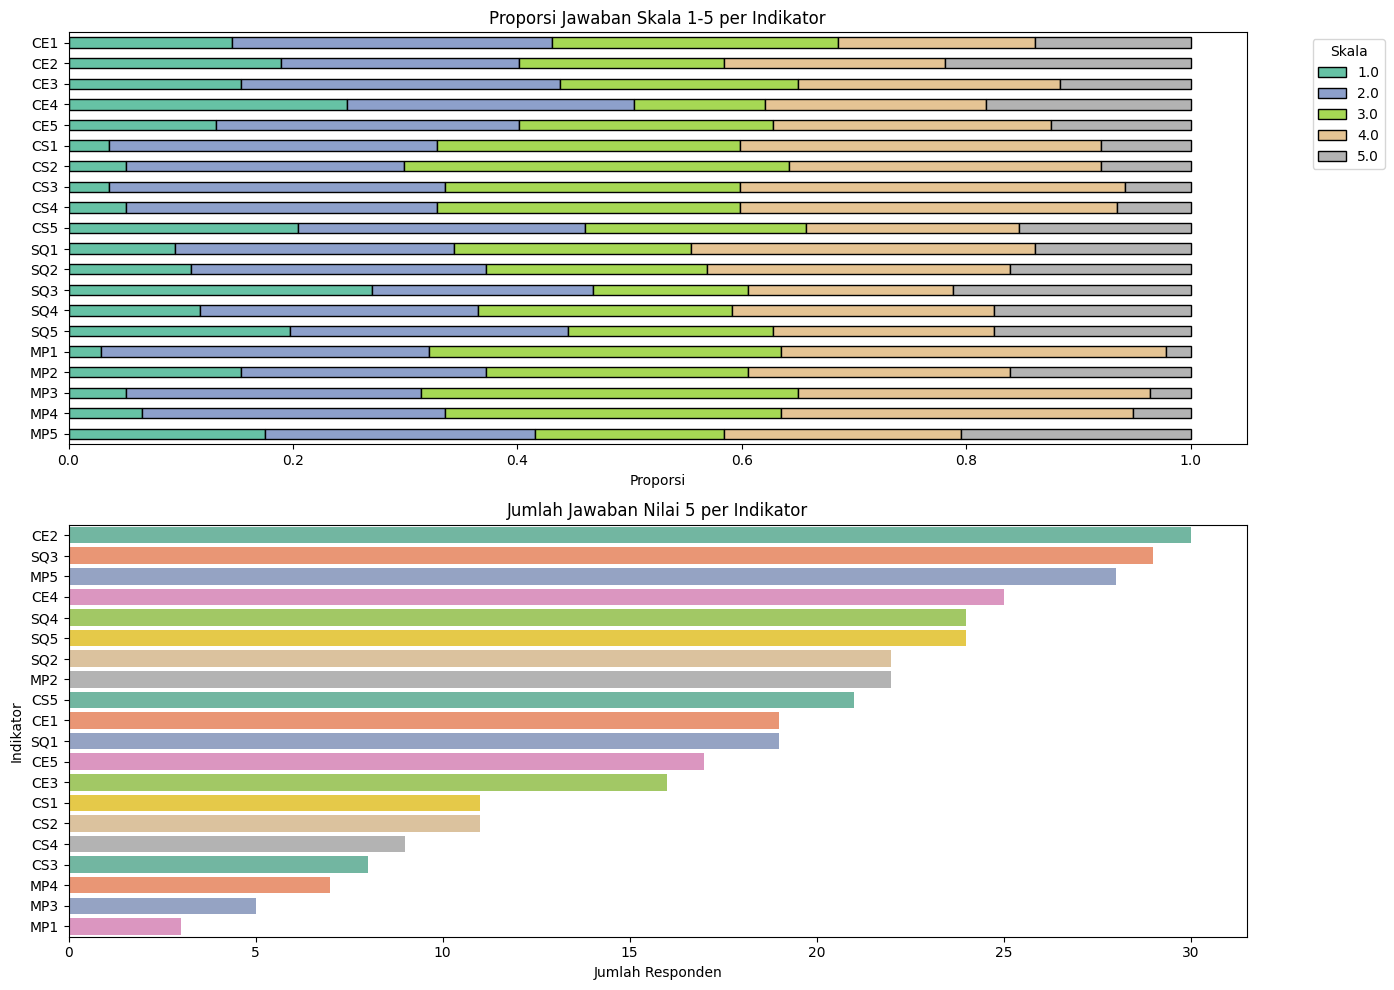

In [ ]:
# Anggap sudah ada dfv, indicators_dict, dan construct_mapping

# Misal mau analisis semua
proporsi_df, top_nilai5 = descriptive_analysis_5scale(
    dfv,
    indicators_dict,
    selected_labels=['X1', 'Y1', 'X2', 'Y2'],  # semua konstruk
    figsize=(14,10),
    palette='Set2'
)


In [ ]:
def plot_pie_from_indicators_dict(
    df,
    indicators_dict,
    selected_labels=None,
    selected_indicators=None,
    label_type='original',
    per_pie=True,
    figsize=(5, 5),
    colors=None,
    title_prefix="Distribusi Responden",
    construct_mapping=None  # << Tambahan baru
):
    """
    Membuat pie chart berdasarkan indicators_dict dengan banyak opsi.

    Parameters:
    - df (pd.DataFrame): Dataset berisi data kuesioner
    - indicators_dict (dict): Dictionary dari generate_variable_mappings_with_descriptions
    - selected_labels (list): Label konstruk yang ingin ditampilkan (contoh ['X1', 'Y1', 'CE', 'SQ']); jika None tampilkan semua
    - selected_indicators (list): Hanya tampilkan indikator tertentu saja (contoh ['CE1', 'CS2', 'X11']); jika None semua
    - label_type (str): Pilih label pie chart: 'original' (CE1, SQ1), 'new_label' (X11, Y12), atau 'description'
    - per_pie (bool): True satu pie per figure, False multi pie satu figure
    - figsize (tuple): Ukuran figure per pie
    - colors (list): List warna
    - title_prefix (str): Awalan untuk title chart
    - construct_mapping (dict): Mapping dari konstruk label ke konstruk nama asli
    """
    if colors is None:
        colors = sns.color_palette('pastel')

    if selected_labels is None:
        selected_labels = indicators_dict.keys()

    pies = []
    titles = []

    # Tambahkan proses normalisasi selected_labels
    normalized_labels = []
    for lbl in selected_labels:
        # Jika label cocok langsung (X1, Y1, etc)
        if lbl in indicators_dict:
            normalized_labels.append(lbl)
        # Cek apakah lbl adalah konstruk asli (seperti CE, SQ)
        elif construct_mapping:
            mapped_label = construct_mapping.get(lbl)
            if mapped_label and mapped_label in indicators_dict:
                normalized_labels.append(mapped_label)

    if not normalized_labels:
        print("⚠️ Tidak ada label konstruk yang cocok ditemukan.")
        return

    for label in normalized_labels:
        indicators_info = indicators_dict.get(label, {})
        for indicator, info in indicators_info.items():
            # Jika dipilih indikator tertentu
            if selected_indicators:
                match = False
                if indicator in selected_indicators:
                    match = True
                elif info['new_label'] in selected_indicators:
                    match = True
                if not match:
                    continue
            counts = df[indicator].value_counts().sort_index()
            pies.append((counts, indicator, info))
            if label_type == 'description':
                title_text = info['description']
            elif label_type == 'new_label':
                title_text = info['new_label']
            else:  # original
                title_text = indicator
            titles.append(f"{title_prefix}: {title_text}")

    if not pies:
        print("⚠️ Tidak ada indikator yang cocok untuk ditampilkan.")
        return

    if per_pie:
        for i, (counts, indicator, info) in enumerate(pies):
            plt.figure(figsize=figsize)
            plt.pie(
                counts,
                labels=[str(int(k)) for k in counts.index],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            plt.title(titles[i])
            plt.tight_layout()
            plt.show()
    else:
        n_pies = len(pies)
        n_cols = 3
        n_rows = (n_pies + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0]*n_cols, figsize[1]*n_rows))
        axes = axes.flatten()

        for i, (counts, indicator, info) in enumerate(pies):
            axes[i].pie(
                counts,
                labels=[str(int(k)) for k in counts.index],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            axes[i].set_title(titles[i])

        # Matikan axis kosong
        for j in range(i+1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


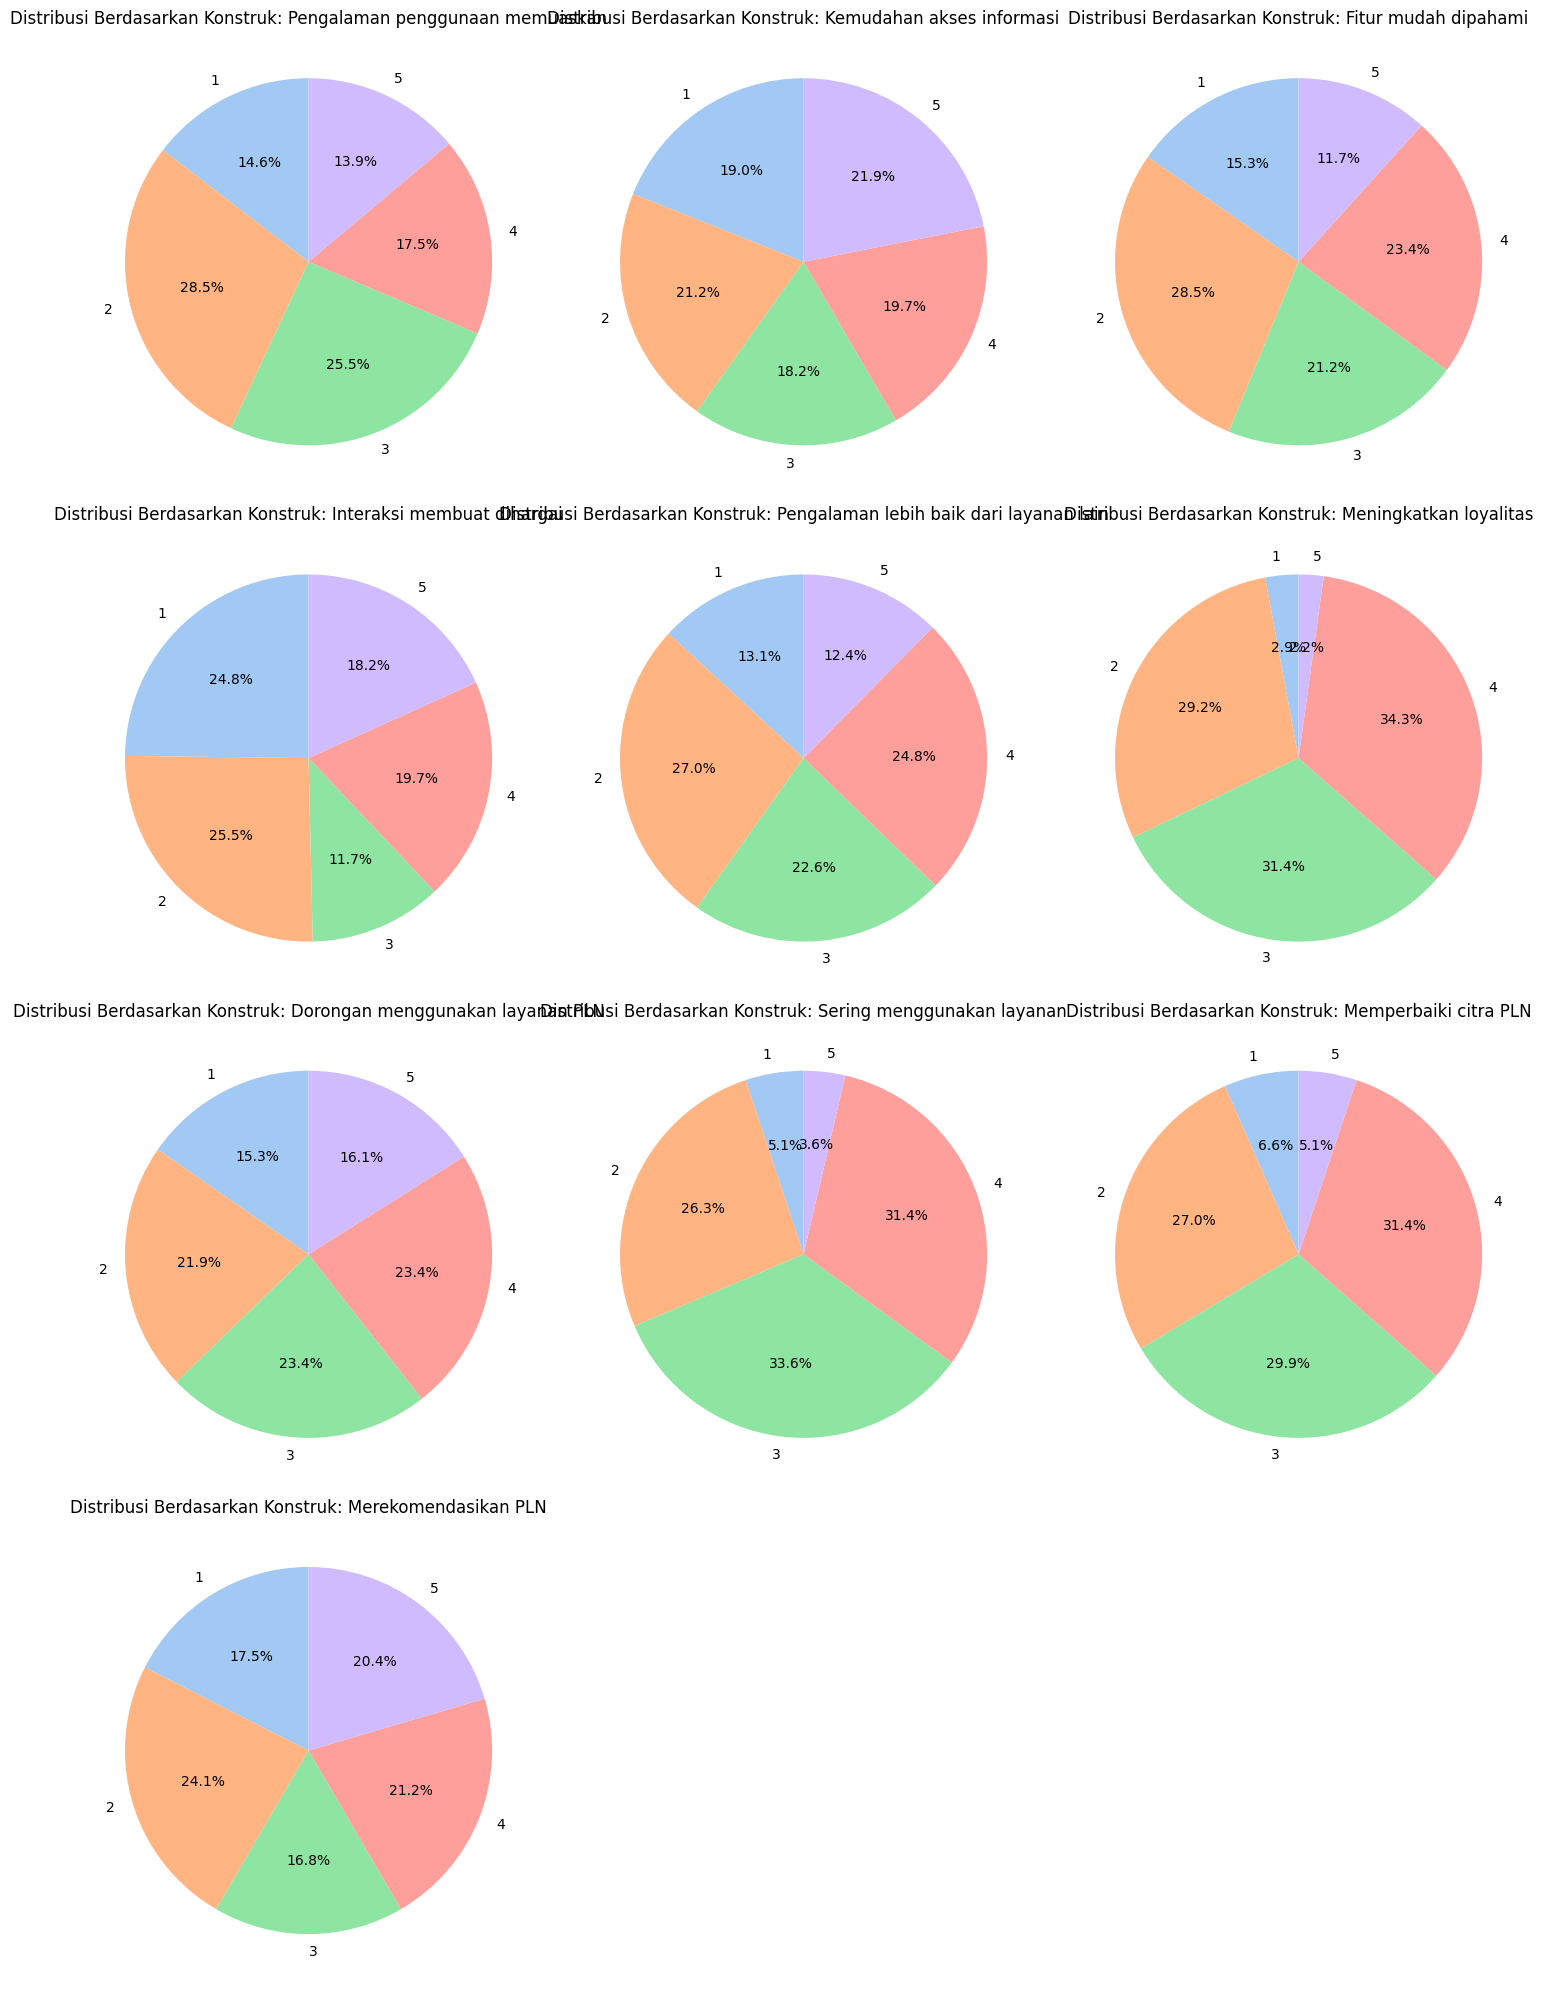

In [ ]:
construct_mapping = {
    'CE': 'X1',
    'SQ': 'X2',
    'CS': 'Y1',
    'MP': 'Y2'
}

plot_pie_from_indicators_dict(
    dfv,
    indicators_dict,
    selected_labels=['CE', 'MP'],   # kamu bisa pakai CE, MP langsung!
    label_type='description',
    per_pie=False,
    figsize=(5,5),
    title_prefix="Distribusi Berdasarkan Konstruk",
    construct_mapping=construct_mapping  # << wajib
)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pie_from_indicators_dict(
    df,
    indicators_dict,
    selected_labels=None,
    selected_indicators=None,
    label_type='original',
    per_pie=True,
    figsize=(5, 5),
    colors=None,
    title_prefix="Distribusi Responden"
):
    """
    Membuat pie chart berdasarkan indicators_dict dengan banyak opsi.

    Parameters:
    - df (pd.DataFrame): Dataset berisi data kuesioner
    - indicators_dict (dict): Dictionary dari generate_variable_mappings_with_descriptions
    - selected_labels (list): Label konstruk yang ingin ditampilkan (contoh ['X1', 'Y1']); jika None tampilkan semua
    - selected_indicators (list): Hanya tampilkan indikator tertentu saja (contoh ['CE1', 'CS2']); jika None semua
    - label_type (str): Pilih label pie chart: 'original' (CE1, SQ1), 'new_label' (X11, Y12), atau 'description'
    - per_pie (bool): True satu pie per figure, False multi pie satu figure
    - figsize (tuple): Ukuran figure per pie
    - colors (list): List warna
    - title_prefix (str): Awalan untuk title chart
    """
    if colors is None:
        colors = sns.color_palette('pastel')

    if selected_labels is None:
        selected_labels = indicators_dict.keys()

    pies = []
    titles = []

    for label in selected_labels:
        indicators_info = indicators_dict.get(label, {})
        for indicator, info in indicators_info.items():
            if selected_indicators and indicator not in selected_indicators:
                continue  # skip jika indikator tidak dipilih
            counts = df[indicator].value_counts().sort_index()
            pies.append((counts, indicator, info))
            if label_type == 'description':
                title_text = info['description']
            elif label_type == 'new_label':
                title_text = info['new_label']
            else:  # 'original'
                title_text = indicator
            titles.append(f"{title_prefix}: {title_text}")

    if not pies:
        print("⚠️ Tidak ada indikator yang cocok untuk ditampilkan.")
        return

    if per_pie:
        for i, (counts, indicator, info) in enumerate(pies):
            plt.figure(figsize=figsize)
            plt.pie(
                counts,
                labels=[str(int(k)) for k in counts.index],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            plt.title(titles[i])
            plt.tight_layout()
            plt.show()
    else:
        n_pies = len(pies)
        n_cols = 3
        n_rows = (n_pies + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0]*n_cols, figsize[1]*n_rows))
        axes = axes.flatten()

        for i, (counts, indicator, info) in enumerate(pies):
            axes[i].pie(
                counts,
                labels=[str(int(k)) for k in counts.index],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            axes[i].set_title(titles[i])

        # Matikan axis kosong
        for j in range(i+1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


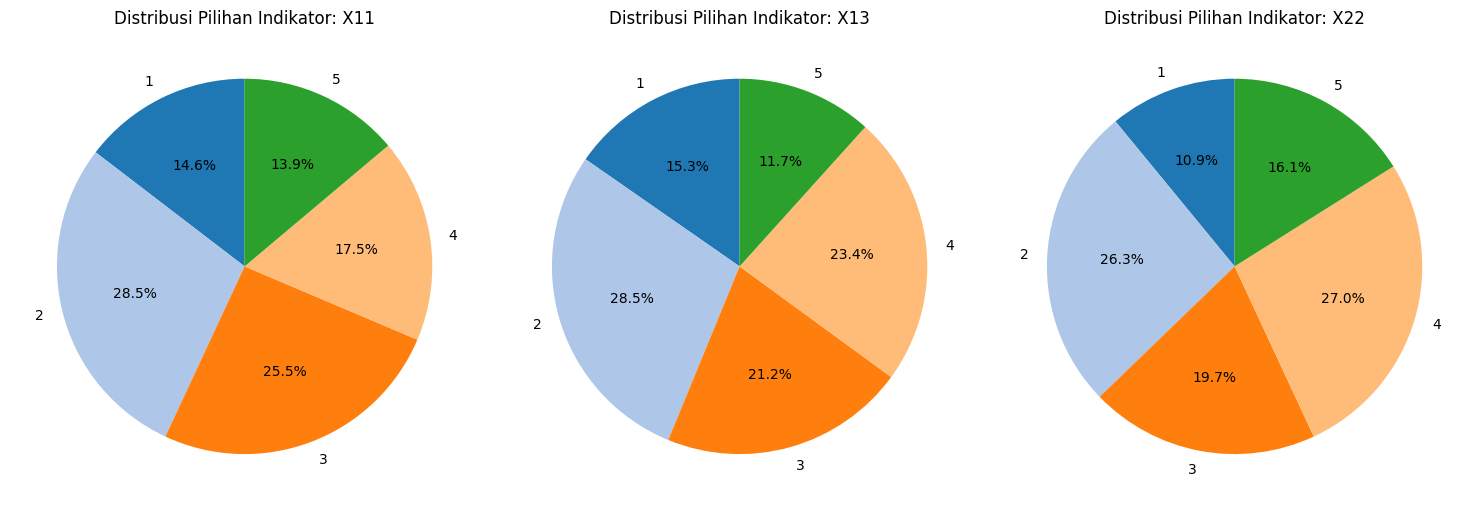

In [ ]:
plot_pie_from_indicators_dict(
    df,
    indicators_dict,
    selected_indicators=['CE1', 'CE3', 'SQ2'],
    label_type='new_label',
    per_pie=False,
    figsize=(5,5),
    colors=sns.color_palette('tab20'),
    title_prefix="Distribusi Pilihan Indikator"
)


In [ ]:
plot_pie_from_indicators_dict(
    dfv,
    indicators_dict,
    selected_labels=['CE'],
    label_type='original',
    per_pie=True,
    figsize=(5,5),
    colors=sns.color_palette('Set2'),
    title_prefix="Distribusi Indikator"
)


⚠️ Tidak ada indikator yang cocok untuk ditampilkan.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pie_from_indicators_dict(
    df,
    indicators_dict,
    selected_labels=None,
    use_description=False,
    per_pie=True,
    figsize=(5, 5),
    colors=None,
    title_prefix="Distribusi Responden"
):
    """
    Membuat pie chart berdasarkan indicators_dict dengan banyak opsi.

    Parameters:
    - df (pd.DataFrame): Dataset yang berisi data kuesioner
    - indicators_dict (dict): Hasil dari generate_variable_mappings_with_descriptions()
    - selected_labels (list): Label yang ingin ditampilkan (misal ['X1', 'Y1']); jika None tampilkan semua
    - use_description (bool): True -> gunakan deskripsi indikator, False -> gunakan nama indikator
    - per_pie (bool): True -> 1 figure per pie, False -> banyak pie dalam satu figure
    - figsize (tuple): Ukuran figure (default (5,5))
    - colors (list): Daftar warna untuk pie chart (default seaborn palette)
    - title_prefix (str): Judul diawali dengan prefix ini
    """
    if colors is None:
        colors = sns.color_palette('pastel')

    if selected_labels is None:
        selected_labels = indicators_dict.keys()

    pies = []
    titles = []

    for label in selected_labels:
        indicators_info = indicators_dict.get(label, {})
        for indicator, info in indicators_info.items():
            counts = df[indicator].value_counts().sort_index()
            pies.append((counts, indicator, info['description'], info['new_label']))
            titles.append(f"{title_prefix}: {info['new_label']}" if not use_description else f"{title_prefix}: {info['description']}")

    if per_pie:
        # Setiap pie chart ditampilkan sendiri
        for i, (counts, indicator, description, new_label) in enumerate(pies):
            plt.figure(figsize=figsize)
            plt.pie(
                counts,
                labels=[str(int(k)) for k in counts.index],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            plt.title(titles[i])
            plt.tight_layout()
            plt.show()
    else:
        # Semua pie chart dikumpulkan jadi satu figure
        n_pies = len(pies)
        n_cols = 3
        n_rows = (n_pies + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0]*n_cols, figsize[1]*n_rows))
        axes = axes.flatten()

        for i, (counts, indicator, description, new_label) in enumerate(pies):
            axes[i].pie(
                counts,
                labels=[str(int(k)) for k in counts.index],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors
            )
            axes[i].set_title(titles[i])

        # Matikan axis kosong
        for j in range(i+1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


In [ ]:
plot_pie_from_indicators_dict(
    dfv,
    indicators_dict,
    selected_labels=['CE', 'SQ'],   # Mau hanya X1 dan Y1
    use_description=False,          # Pakai label indikator (X11, X12, dst)
    per_pie=True,                    # Pie chart satuan
    figsize=(5,5),
    colors=sns.color_palette('Set3'),
    title_prefix="Distribusi Responden"
)


In [ ]:
import matplotlib.pyplot as plt

def plot_pie_charts_from_mapping(df, indicators_dict, use_description=False, title_prefix="Distribusi Jawaban"):
    """
    Membuat pie chart dari mapping indikator berdasarkan X dan Y dari hipotesis.

    Parameters:
    - df (pd.DataFrame): Dataframe kuesioner
    - indicators_dict (dict): Dictionary hasil generate_variable_mappings_with_descriptions
    - use_description (bool): True jika label mau pakai deskripsi, False untuk pakai nama indikator
    - title_prefix (str): Awalan untuk judul chart
    """
    for hyp, mapping in indicators_dict.items():
        for var_type in ['X', 'Y']:
            var_info = mapping[var_type]
            for indicator in var_info['indicators']:
                counts = df[indicator].value_counts().sort_index()

                plt.figure(figsize=(5,5))
                plt.pie(
                    counts,
                    labels=[str(int(k)) for k in counts.index],
                    autopct='%1.1f%%',
                    startangle=90,
                    colors=plt.cm.Set3.colors
                )

                # Buat title tergantung mau deskripsi atau kode indikator
                if use_description:
                    label = var_info['descriptions'].get(indicator, indicator)
                else:
                    label = indicator

                plt.title(f"{title_prefix}: {label} ({hyp}-{var_type})")
                plt.tight_layout()
                plt.show()


In [ ]:
dfv = pd.read_csv('/content/data_manipulasi_sem.csv')

# df = dataframe kamu
# indicators_dict = hasil dari generate_variable_mappings_with_descriptions(constructs, hypotheses, indicator_descriptions)

plot_pie_charts_from_mapping(dfv, indicators_dict, use_description=True, title_prefix="Distribusi Responden")


KeyError: 'X'

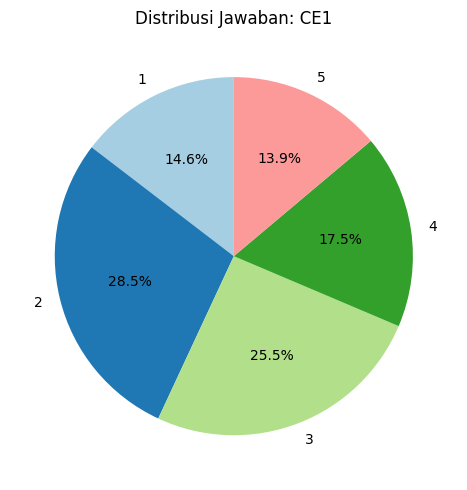

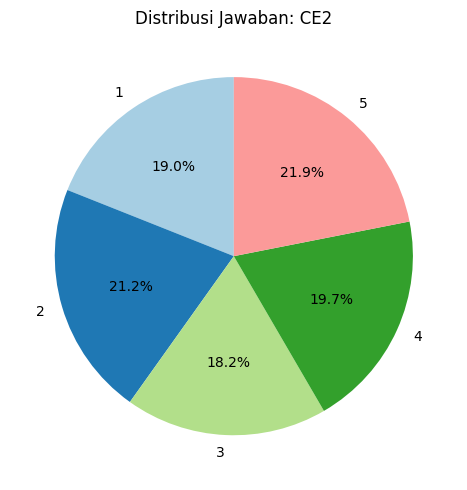

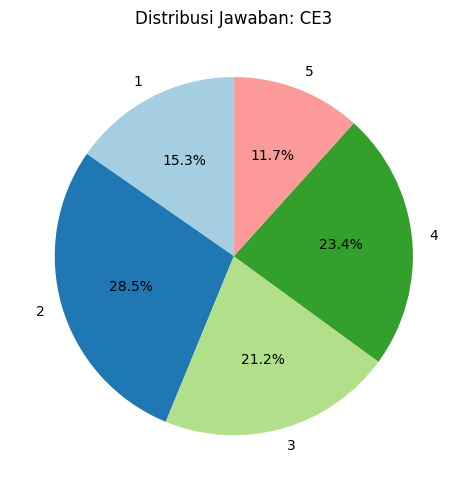

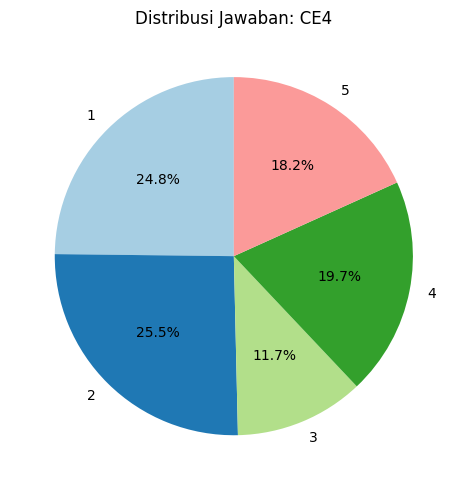

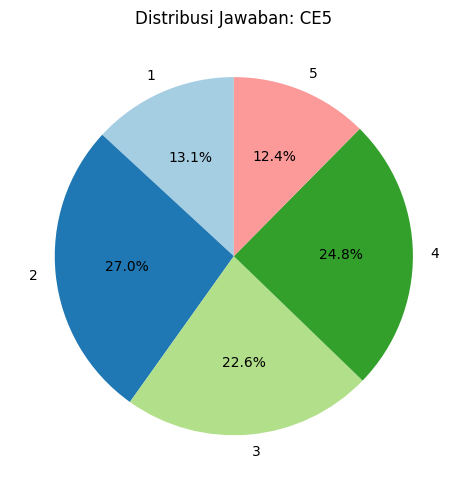

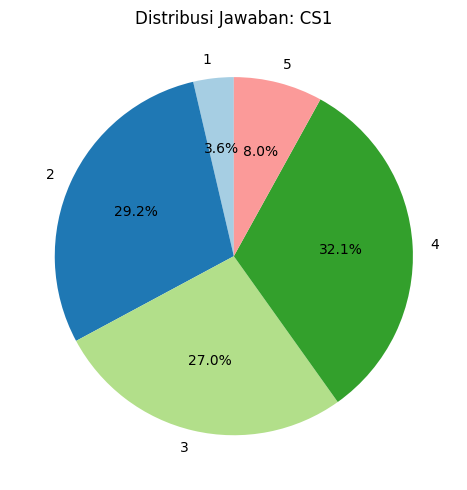

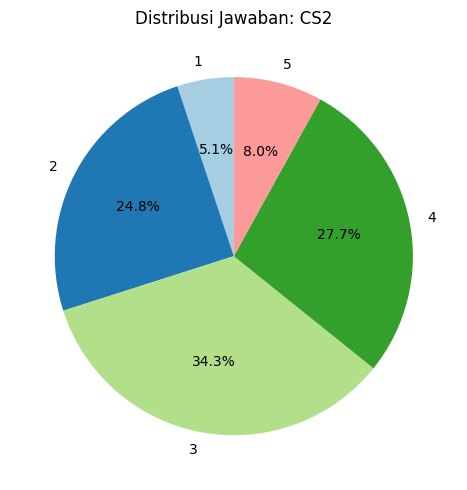

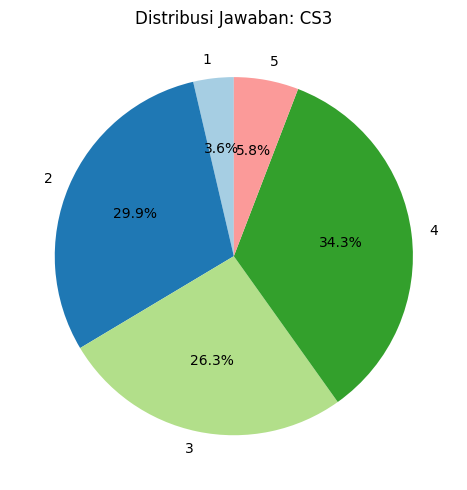

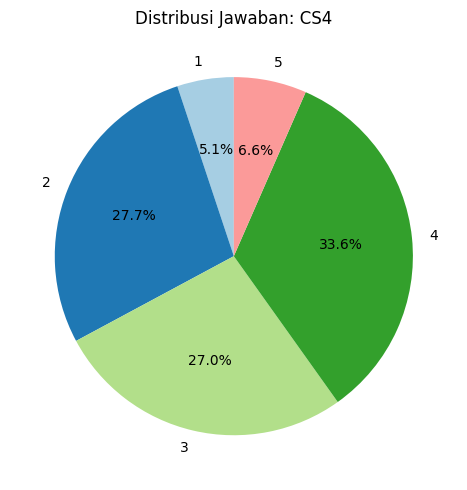

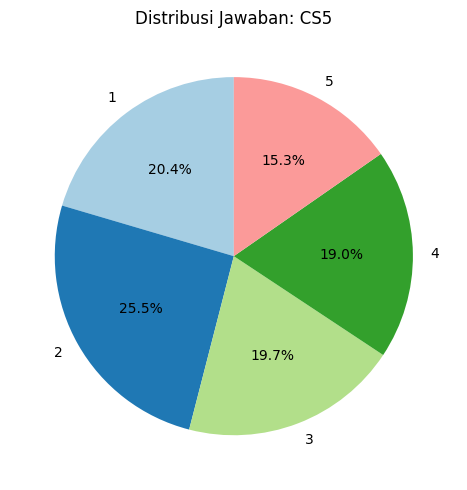

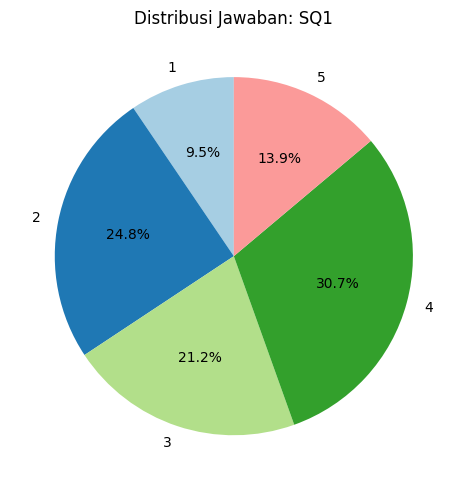

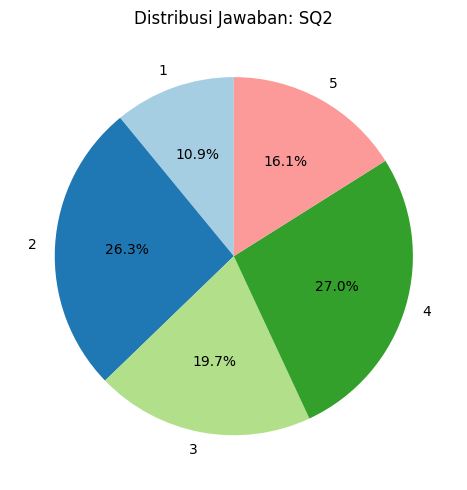

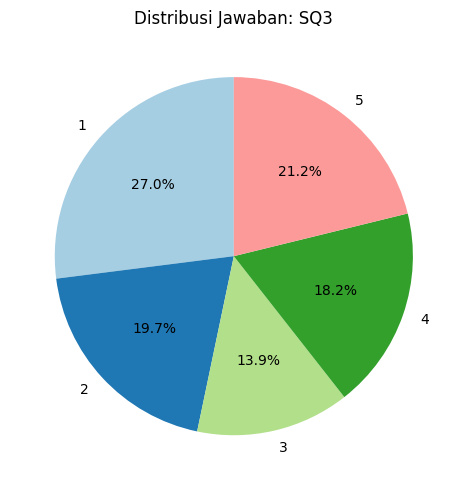

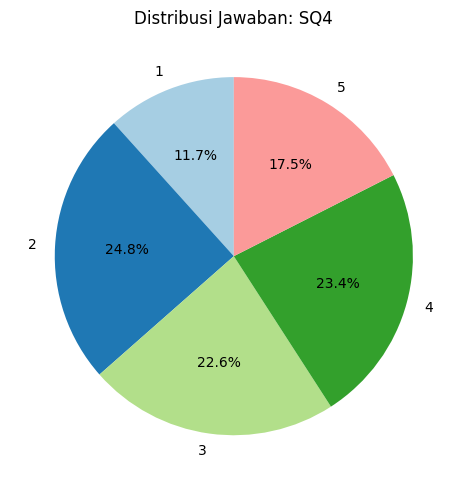

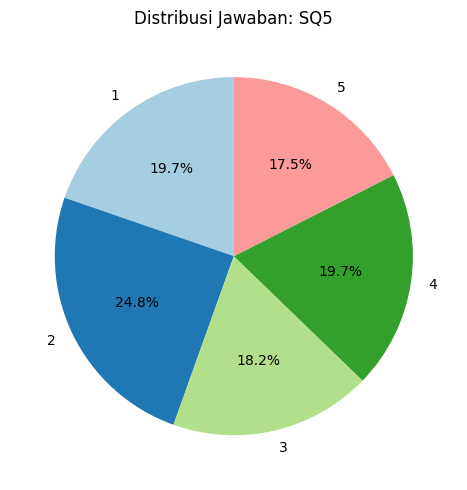

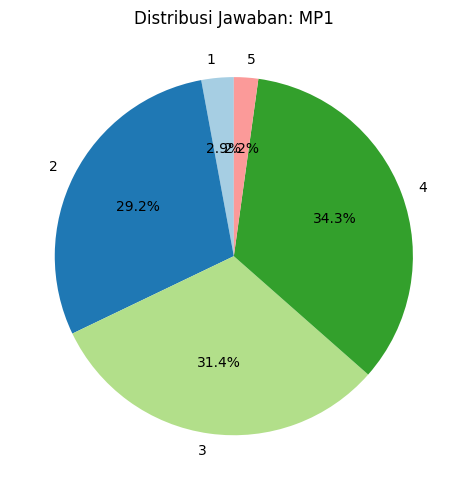

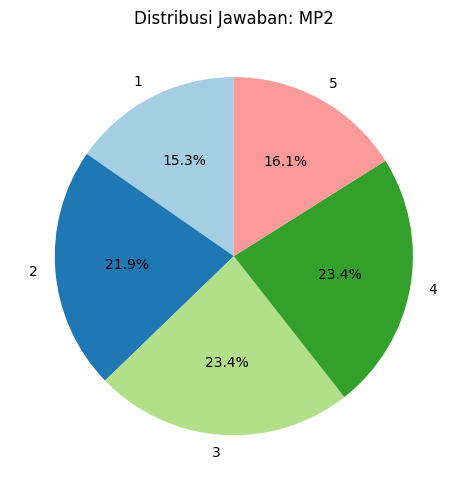

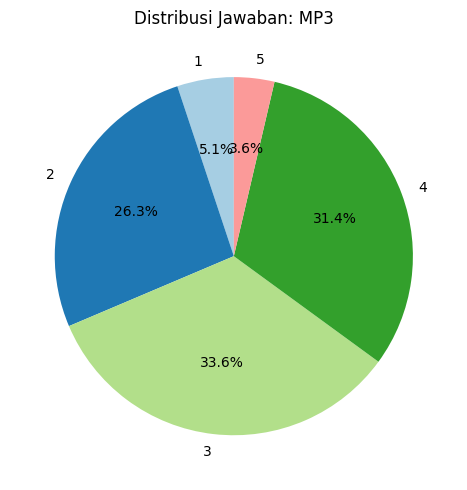

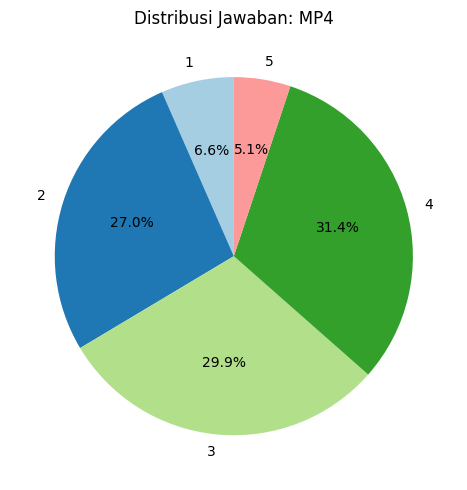

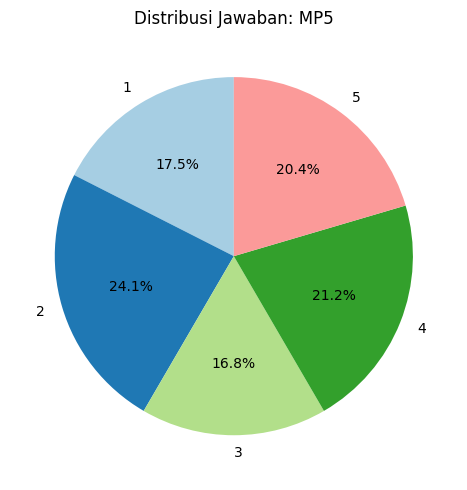

In [ ]:
plot_pie_charts(dfv, constructs, use_description=False, title_prefix="Distribusi Jawaban")


In [ ]:
import matplotlib.pyplot as plt

def plot_pie_charts(df, groups, title_prefix="Distribusi"):
    """
    Membuat pie chart untuk proporsi distribusi per konstruk atau indikator.

    Parameters:
    - df (pd.DataFrame): Dataframe data kuesioner
    - groups (dict): Dictionary konstruk -> list indikator
    - title_prefix (str): Prefix judul chart
    """
    for construct, indicators in groups.items():
        for col in indicators:
            counts = df[col].value_counts().sort_index()

            plt.figure(figsize=(5,5))
            plt.pie(
                counts,
                labels=[f"{int(k)}" for k in counts.index],
                autopct='%1.1f%%',
                startangle=90,
                colors=plt.cm.Paired.colors
            )
            plt.title(f"{title_prefix}: {col}")
            plt.tight_layout()
            plt.show()


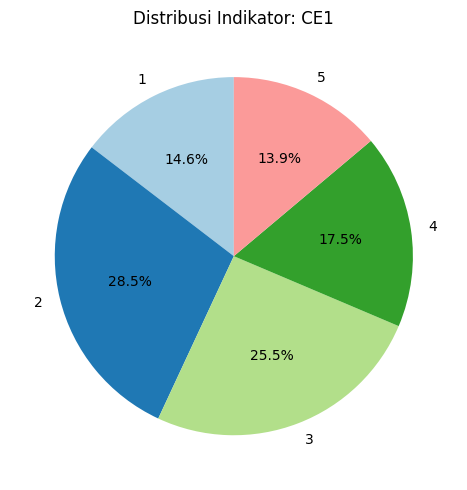

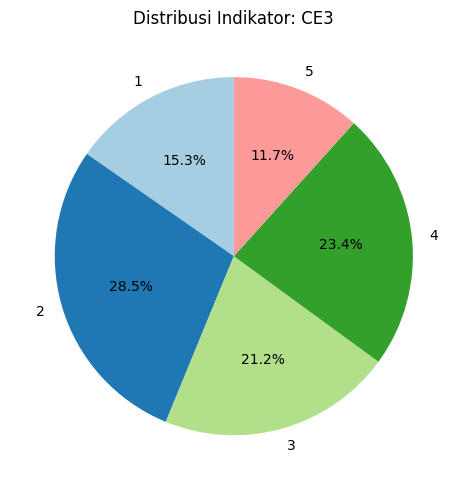

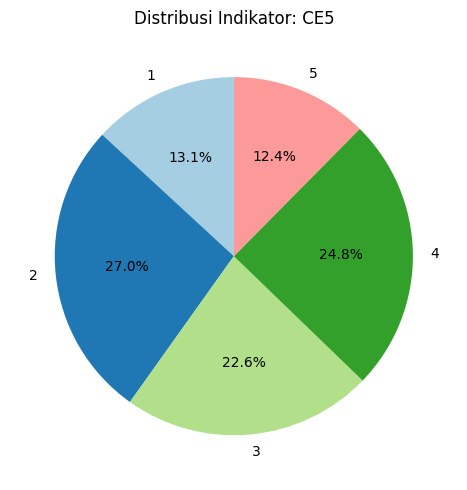

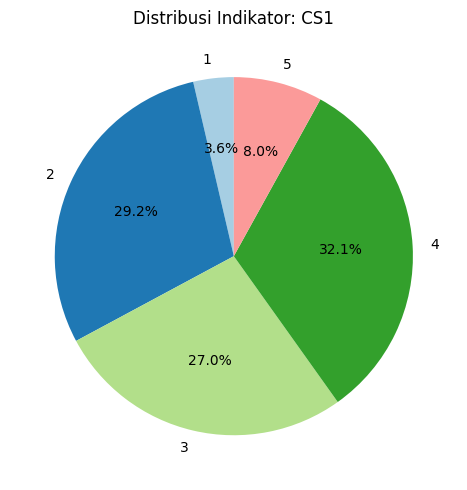

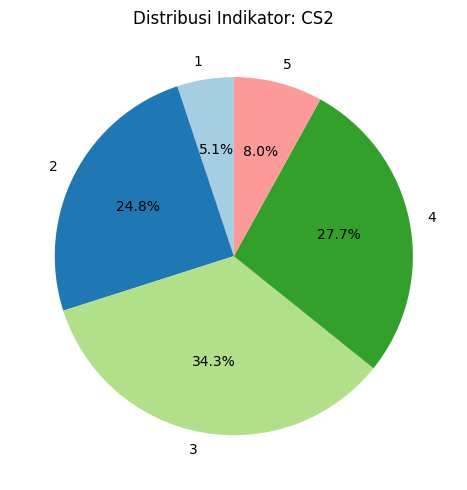

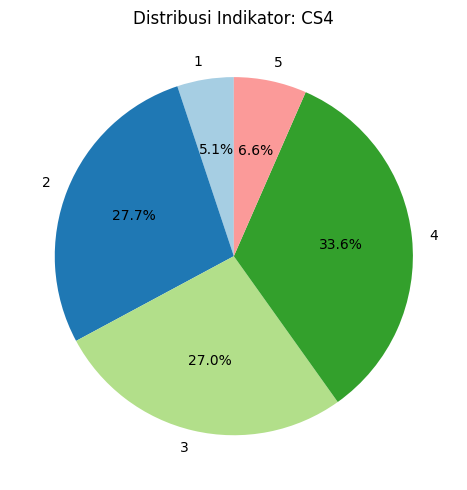

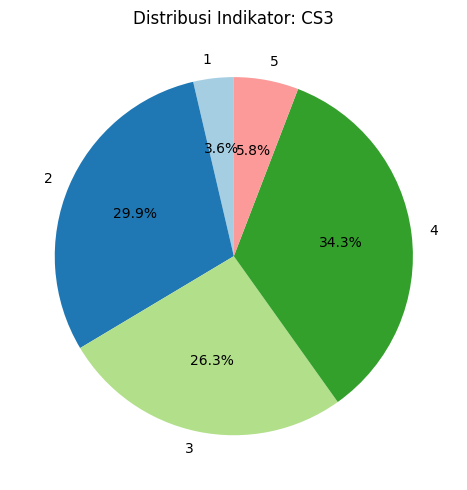

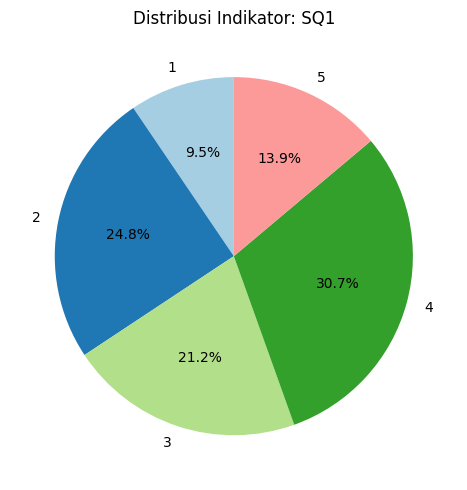

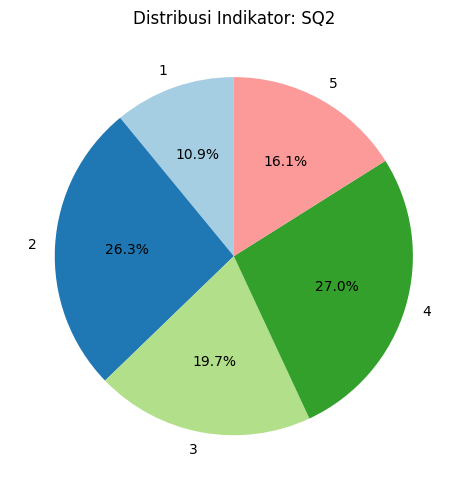

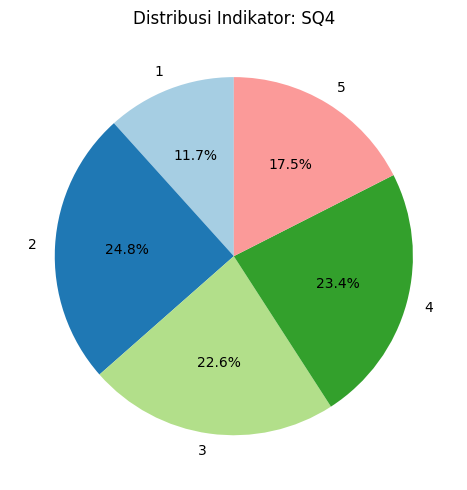

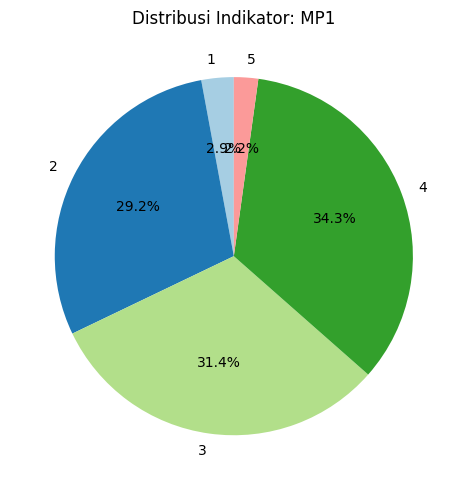

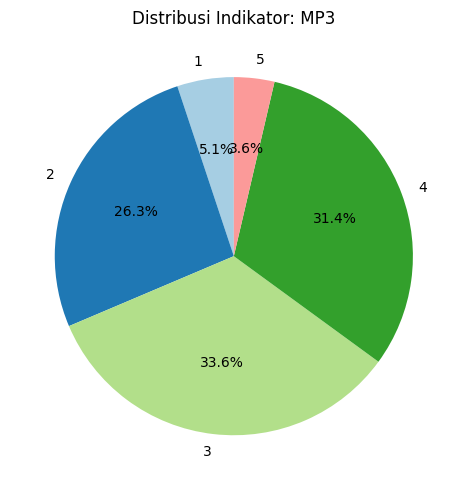

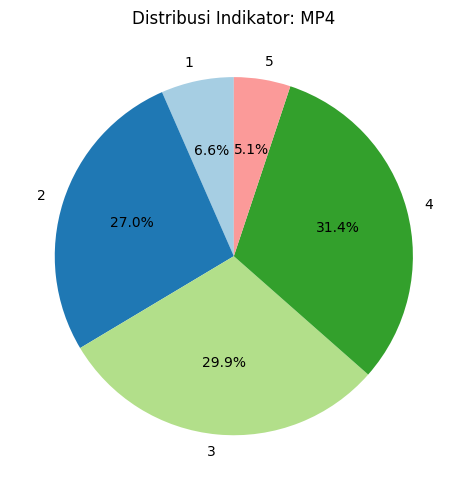

In [ ]:
plot_pie_charts(df, constructs, title_prefix="Distribusi Indikator")


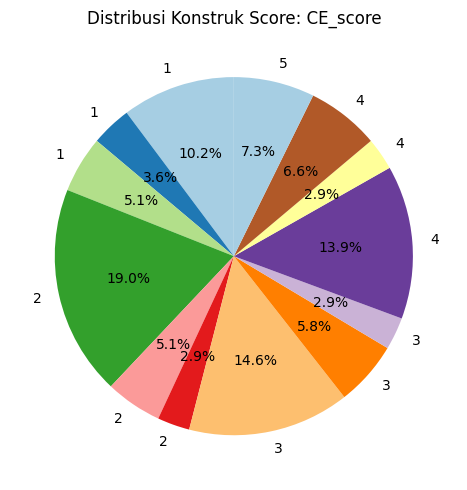

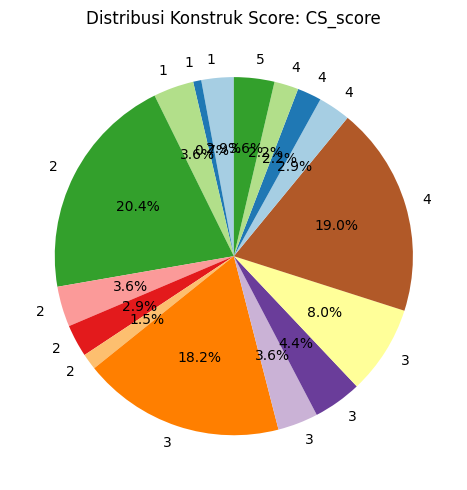

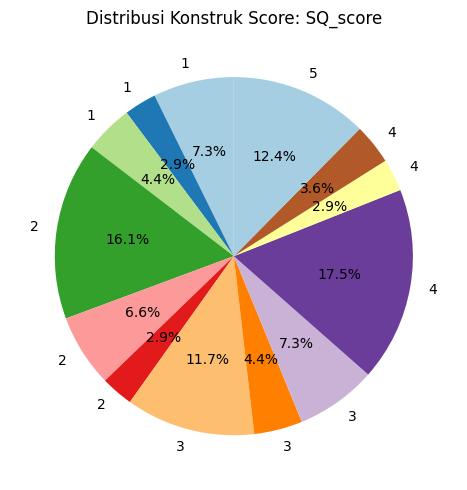

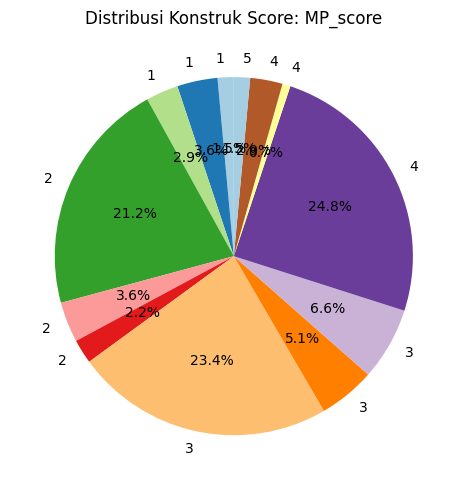

In [ ]:
construct_scores = {k: [f"{k}_score"] for k in constructs.keys()}
plot_pie_charts(df, construct_scores, title_prefix="Distribusi Konstruk Score")


In [ ]:
import matplotlib.pyplot as plt

def plot_pie_chart(data, columns, title_prefix="Distribusi"):
    """
    Membuat pie chart untuk satu atau banyak kolom dalam dataframe.

    Parameters:
    - data (pd.DataFrame): dataframe yang berisi data kuesioner
    - columns (list of str): daftar nama kolom yang ingin dibuat pie chart
    - title_prefix (str): prefix untuk judul chart
    """

    n_cols = 2
    n_rows = (len(columns) + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        counts = data[col].value_counts().sort_index()
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        axes[i].set_title(f"{title_prefix} - {col}")

    # Kalau jumlah kolom ganjil, hapus plot kosong
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


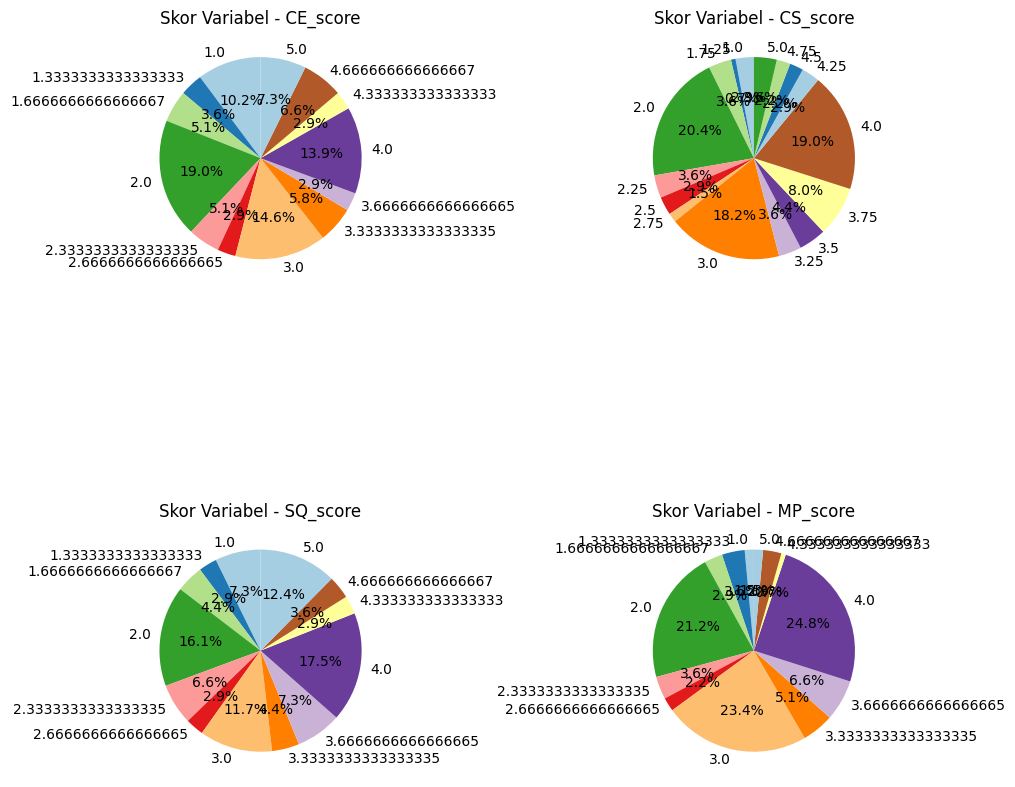

In [ ]:
# Plot Pie untuk skor konstruk
construct_scores = [f'{c}_score' for c in constructs.keys()]
plot_pie_chart(df, construct_scores, title_prefix="Skor Variabel")


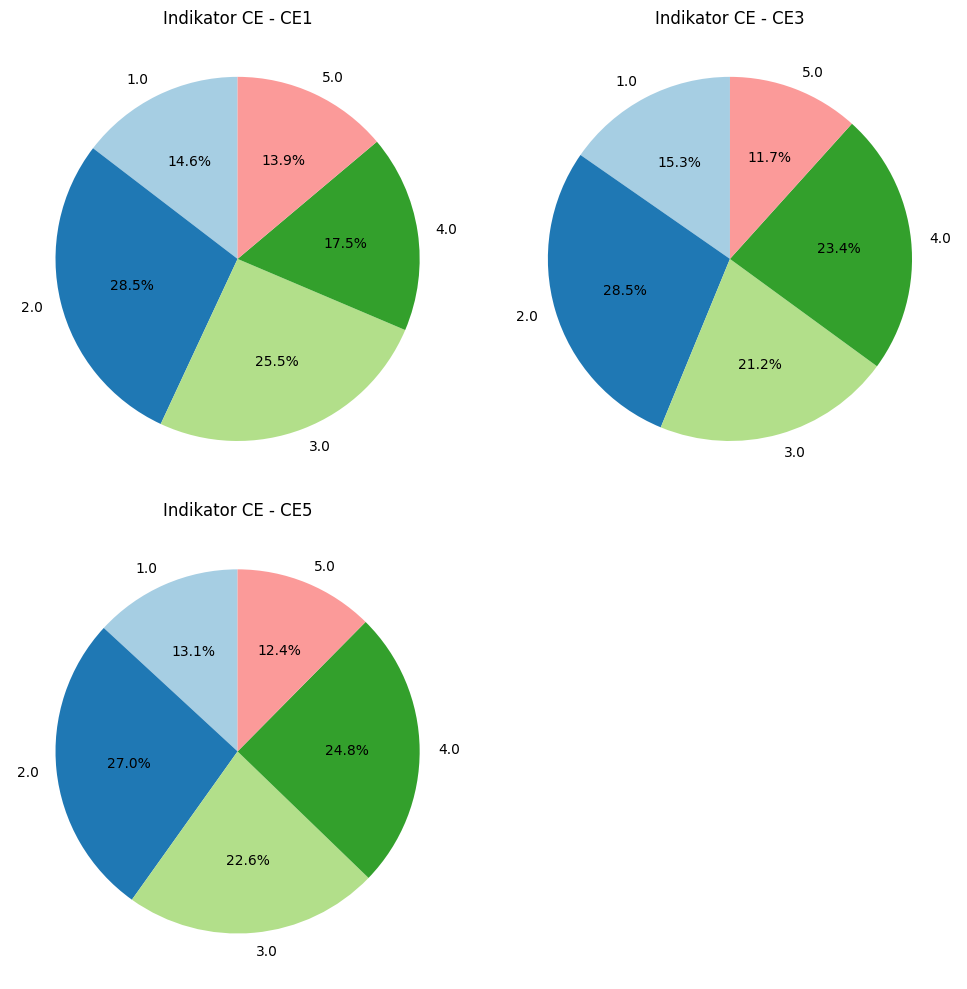

In [ ]:
# Plot Pie untuk semua indikator di konstruk CE
plot_pie_chart(df, constructs['CE'], title_prefix="Indikator CE")


# Hasil DAn Parameter

In [ ]:
relations = [
    ('CS', ['SQ'], [0.8]),           # SQ → CS
    ('MP', ['SQ','CE','CS'], [0.2,0.1,0.7]),  # CE + CS + SQ → MP
    ('CS', ['CE'], [0.7])            # SQ → CE
]

noise_dict = {
    'SQ1': 0.25,
    'SQ2': 0.05,
    'CE1': 0.25,
    'CE5': 0.25,
    'MP1': 0.10,
    'MP3': 0.15,
    'MP4': 0.25,
    'CS1': 0.15,
    'CS3': 0.05
}


Predictor	Outcome	Coefficient (β)	Intercept	R²
0	CE_score	CS_score	0.6852	0.0353	0.8692
1	SQ_score	CS_score	-0.1894	2.6079	0.0624
2	CE_score	MP_score	-0.0639	2.7466	0.0077
3	SQ_score	MP_score	0.6903	0.5092	0.8439
4	CS_score	MP_score	-0.1045	2.7729	0.0111

In [ ]:
# STEP 4: Jalankan fungsi
Con_rand = {
    'CE': ['CE1','CE3', 'CE5'],
    'CS': ['CS1','CS2','CS4','CS3'],
    'SQ': ['SQ1', 'SQ2','SQ4'],
    'MP': ['MP1','MP3', 'MP4']
}

relations = [
    ('CS', ['SQ'], [0.8]),           # SQ → CS
    ('MP', ['SQ','CE','CS'], [0.25,0.15,0.6]),  # CE + CS + SQ → MP
    ('CS', ['CE'], [0.7])            # SQ → CE
]

noise_dict = {
    'SQ1': 0.25,
    'SQ2': 0.05,
    'CE1': 0.25,
    'CE5': 0.25,
    'MP1': 0.10,
    'MP3': 0.15,
    'MP4': 0.25,
    'CS1': 0.15,
    'CS3': 0.05
}

Predictor	Outcome	Coefficient (β)	Intercept	R²
0	CE_score	CS_score	0.6777	0.0446	0.8690
1	SQ_score	CS_score	-0.1373	2.4016	0.0336
2	CE_score	MP_score	0.0524	2.4088	0.0056
3	SQ_score	MP_score	0.6463	0.6552	0.8076
4	CS_score	MP_score	0.0528	2.4543	0.0030





In [ ]:
# Perbaikan relasi: gabungkan CE dan SQ → CS
relations = [
    ('CS', ['SQ', 'CE'], [0.75, 0.25]),           # SQ + CE → CS
    ('MP', ['SQ', 'CE', 'CS'], [0.30, 0.2, 0.5]) # SQ + CE + CS → MP
]

# Kurangi noise untuk indikator-indikator penting
noise_dict = {
    'SQ1': 0.25,
    'SQ2': 0.05,
    'CE1': 0.25,
    'CE5': 0.25,
    'MP1': 0.10,
    'MP3': 0.15,
    'MP4': 0.25,
    'CS1': 0.15,
    'CS3': 0.05
}

Predictor	Outcome	Coefficient (β)	Intercept	R²
0	CE_score	CS_score	0.0471	2.8448	0.0045
1	SQ_score	CS_score	0.6361	1.0906	0.8074
2	CE_score	MP_score	0.1491	2.5400	0.0554
3	SQ_score	MP_score	0.5130	1.4476	0.6487
4	CS_score	MP_score	0.8327	0.4898	0.8565